# Лабораторная работа №3
## Обработка бинарных изображений. Морфология.

**Выполнил**: Музыка Артем

9 вариант

**Для работы с изображениями использовать `OpenCV`(открытие, сохранение и т.д.). Для визуализации можно использовать `matplotlib`. Все необходимые для задания функции реализовывать самим, а не использовать готовые в `OpenCV`, если не указано обратного.**
### 1. Создать средствами OpenCV бинарное изображение с простым рисунком.
Рисунок из простых фигур: квадрат, круг и т.д.

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from random import randint

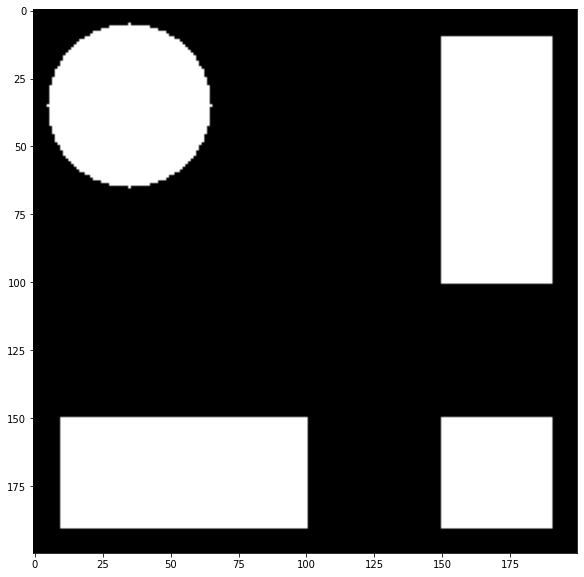

In [26]:
height, width = 200, 200
img = np.full(shape=(height, width), fill_value=0)

cv2.circle(img, center=(35, 35), radius=30, color=(1, 1, 1), thickness= -1)
cv2.rectangle(img, pt1=(150, 150), pt2=(190, 190), color = (1,1,1), thickness= - 1)
cv2.rectangle(img, pt1=(10, 150), pt2= (100, 190), color=(1,1,1), thickness= -1)
cv2.rectangle(img, pt1=(150,10), pt2=(190, 100), color=(1,1,1), thickness = -1)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(img, cmap = 'gray')
plt.show()

### 2. Зашумить изображение имульсным шумом с вероятностью *0.3*
- вход: изображение из пункта 1
- вывод: зашумленное изображение

In [27]:
def noise(img: np.ndarray, p: float) -> np.ndarray:
    noise = np.array(img, copy=True)
    p *= 100
    for i in range (len(img)):
        for j in range(len(img[0])):
            if randint(0,100) < p:
                noise[i][j] = 1
    return noise

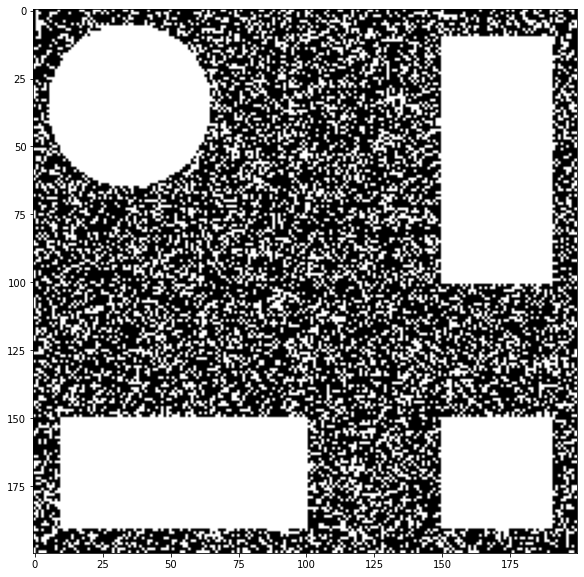

In [28]:
noised = noise(img, 0.3) 
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(noised, cmap = 'gray')
plt.show()

### 3. Написать функции реализации эрозии и дилатации
Функции вида *fun(Image, struct)*, где *struct* - структурный элемент в виде матрицы.

In [29]:
def from_window(window: np.ndarray, struct: np.ndarray) -> list:
    values = []
    for i in range(0, len(struct)):
        for j in range(0, len(struct[0])):
            if struct[i, j] == 1:
                values.append(window[i, j])
    return values

def dilate(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:    
    H, W = input_image.shape
    struct_H, struct_W = struct.shape

    augmented_image = np.zeros((H + 2 * (struct_H // 2), W + 2 * (struct_W // 2)))
    augmented_image[
        (struct_H // 2) : H + 2 * (struct_H // 2)- (struct_H // 2),
        (struct_W // 2) :  W + 2 * (struct_W // 2) - (struct_W // 2)
    ] = input_image
    res = input_image.copy()

    for i in range(H):
        for j in range(W):
            current_window = augmented_image[i : i + struct_H, j : j + struct_W]
            res[i, j] = np.max(from_window(current_window, struct))
    return res

In [30]:
def erose(input_image: np.ndarray, struct: np.ndarray) -> np.ndarray:
    H, W = input_image.shape
    struct_H, struct_W = struct.shape

    augmented_image = np.zeros((H + 2 * (struct_H // 2), W + 2 * (struct_W // 2)))
    augmented_image[
        (struct_H // 2) : H + 2 * (struct_H // 2)- (struct_H // 2),
        (struct_W // 2) :  W + 2 * (struct_W // 2) - (struct_W // 2)
    ] = input_image
    res = input_image.copy()

    for i in range(H):
        for j in range(W):
            current_window = augmented_image[i : i + struct_H, j : j + struct_W]
            res[i, j] = np.min(from_window(current_window, struct))
    return res

### 4. Выпонить оперции эрозии и дилатации для зашумленного изображения со структурным элементом заданным по вариантам. (крест 3х3)
- вход: изображение из пункта 2
- вывод: исходное (из пункта 1), зашумленное (из пункта 2) и изображения после эрозии и дилатации.

In [31]:
structure = np.array([[0,1,0],[1,1,1],[0,1,0]])

In [32]:
erosd = erose(noised, structure)
dilated = dilate(noised, structure)

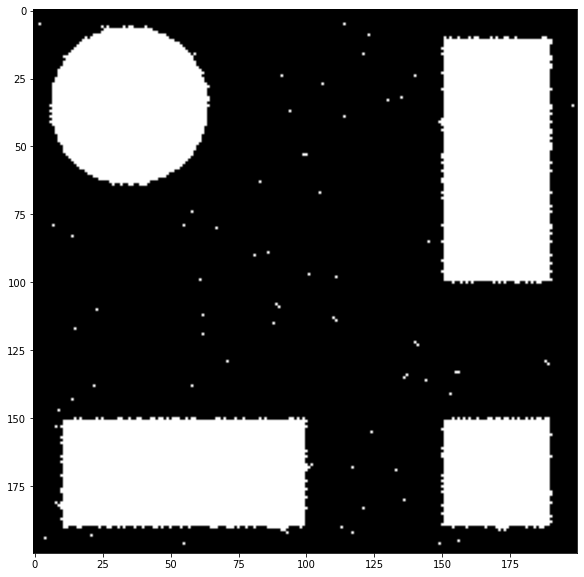

In [33]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(erosd, cmap = 'gray')
plt.show()

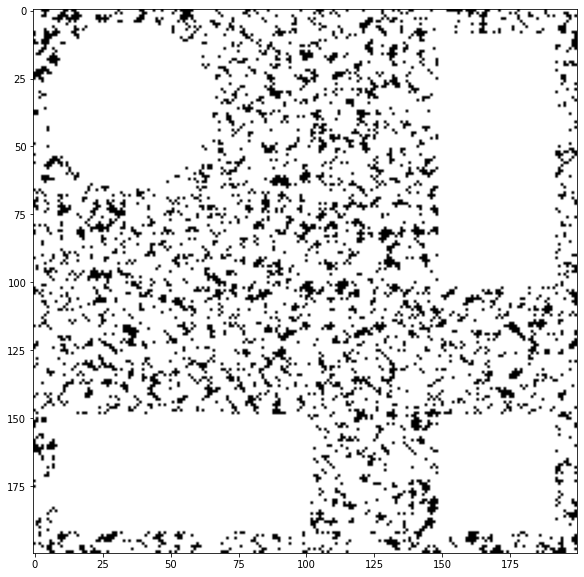

In [34]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot()
ax.imshow(dilated, cmap = 'gray')
plt.show()

### 5. Отфильтровать зашумленное изображение при помощи морфологических операций вскрытия и закрытия (структурный элемент: крест 3х3). Подсчитать коэффициент шума для результата фильтрации. 
- вход: изображение из пункта 2
- вывод: исходное (из пункта 1), зашумленное (из пункта 2) и изображения после эрозии и дилатации. Коэффициент шума.
- Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.

In [35]:
coef_noise = np.sum(noised != img)

img_open = dilate(erose(noised, structure), structure)
coef_open = np.sum(img_open != img)

img_close = erose(dilate(noised, structure), structure)
coef_close = np.sum(img_close != img)

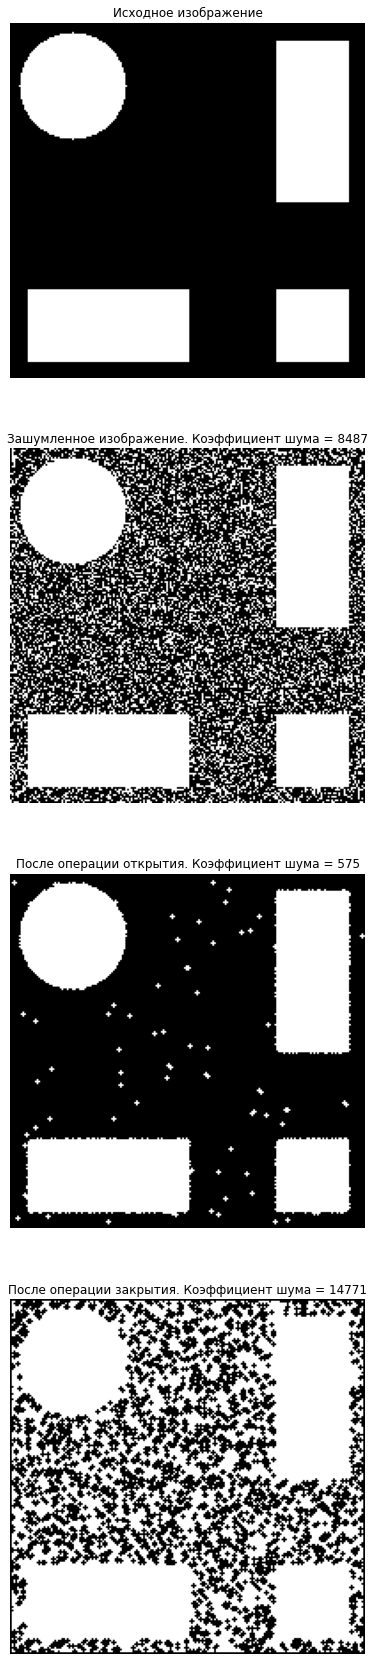

In [36]:
plt.figure(figsize=(30,30))

plt.subplot(4, 1, 1)
plt.axis("off")
plt.title("Исходное изображение")
plt.imshow(img, cmap = 'gray')

plt.subplot(4, 1, 2)
plt.axis("off")
plt.title("Зашумленное изображение. Коэффициент шума = " + str(coef_noise))
plt.imshow(noised, cmap = 'gray')

plt.subplot(4, 1, 3)
plt.axis("off")
plt.title("После операции открытия. Коэффициент шума = " + str(coef_open))
plt.imshow(img_open, cmap = 'gray')

plt.subplot(4, 1, 4)
plt.axis("off")
plt.title("После операции закрытия. Коэффициент шума = " + str(coef_close))
plt.imshow(img_close, cmap = 'gray')
plt.show()

### 6. Отфильтровать изображение при помощи логического фильтра. Подсчитать коэффициент шума для результата фильтрации.
- вход: изображение из пункта 2.
- вывод: исходное (из пункта 1), зашумленное (из пункта 2) и отфильтрованное изображение. Коэффициент шума.
- Коэффициент шума считать как количество несовпавших пикселей между отфильтрованным изображением и исходным (не зашумленным) из пункта 1.
- таблица логического фильтра в лекции. Слайд 17.

$$ y(m, n) = F(x(k, l)), (k - m, n - l)\in D $$

In [37]:
def binary_filter(img: np.ndarray)->np.ndarray:
    H, W = img.shape
    base_size = H + 2, W + 2

    res = np.zeros(base_size, dtype=np.uint8)
    res[1: H + 1, 1: W + 1] = img
    res_H, res_W = res.shape

    filtrd = np.array(res, copy=True)
    filtrd = filtrd.astype(bool)

    for i in range(res_H-1):
        for j in range(res_W-1):
            r1 = res[i - 1, j] or res[i, j - 1] or res[i, j + 1] or res[i + 1, j]
            r2 = res[i - 1, j] and res[i, j - 1] and res[i, j + 1] and res[i + 1, j]
            r = res[i, j] and r1 or (not res[i, j]) and r2
            filtrd[i, j] = r
    return filtrd[1: H + 1, 1: W + 1]

In [38]:
binary_img = binary_filter(noised)
coef_binary = np.sum(binary_img != img)

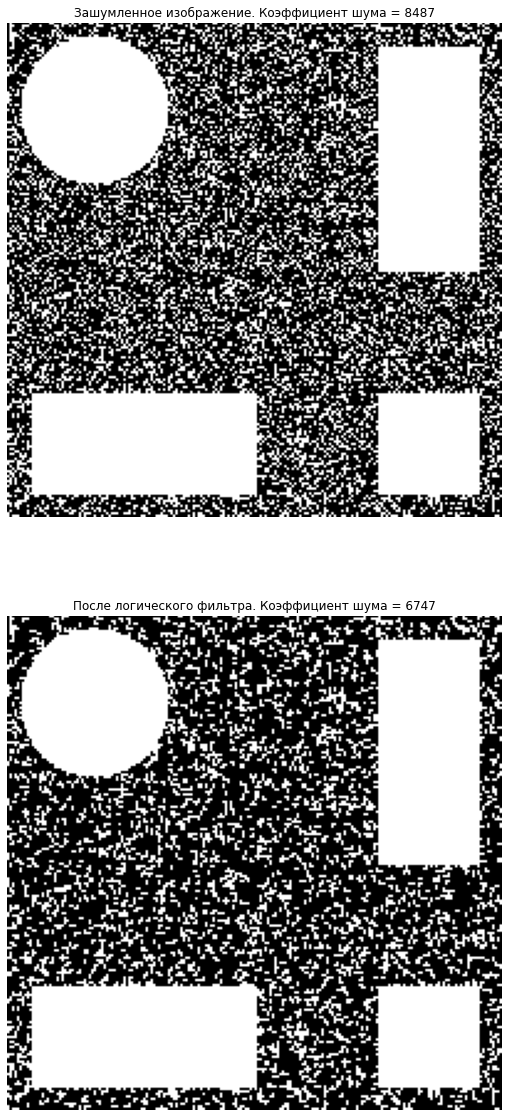

In [45]:
plt.figure(figsize=(20,20))
plt.subplot(2, 1, 1)
plt.axis("off")
plt.title("Зашумленное изображение. Коэффициент шума = " + str(coef_noise))
plt.imshow(noised, cmap = 'gray')

plt.subplot(2, 1, 2)
plt.axis("off")
plt.title("После логического фильтра. Коэффициент шума = " + str(coef_binary))
plt.imshow(binary_img, cmap = 'gray')

### 7. На исходном изображении с помощью морфологических операций выделить контур объекта. Выяснить, когда контур получается внешним, внутренним, четырехсвязным, восьмисвязным.
- вход: изображение из пункта 1
- вывод: исходное изображение, изображение с выделенными контурами.

#### Восьмисвязный

In [15]:
img_8_in = (img + erose(img, structure)) % 2
img_8_out = (img + dilate(img, structure)) % 2

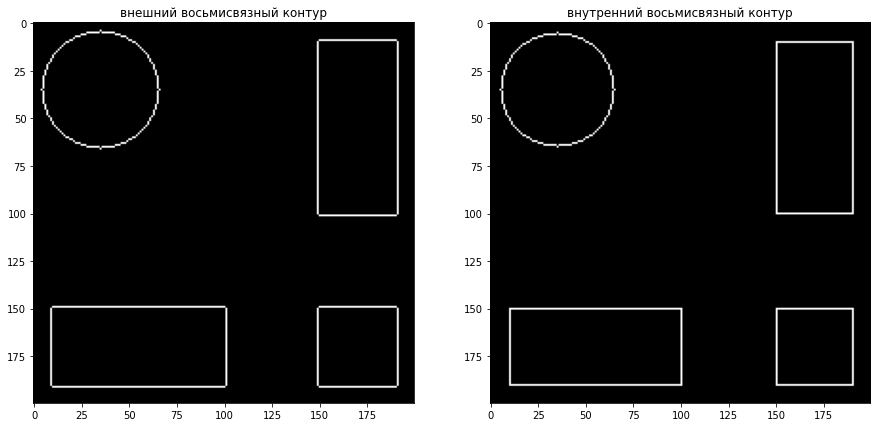

In [16]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("внешний восьмисвязный контур")
plt.imshow(img_8_out, cmap = 'gray')


plt.subplot(1, 2, 2)
plt.title("внутренний восьмисвязный контур")
plt.imshow(img_8_in, cmap = 'gray')
plt.show()

#### Четырехсвязный

In [17]:
struct4 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
img_4_in = (img + erose(img, struct4)) % 2
img_4_out = (img + dilate(img, struct4)) % 2

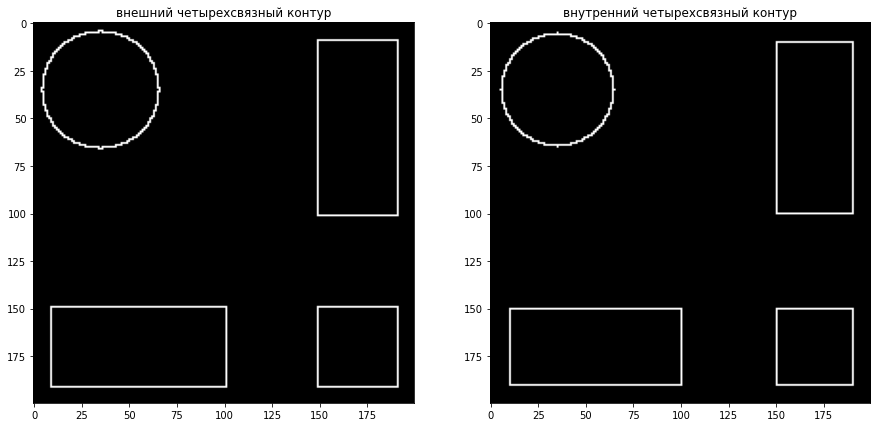

In [18]:
plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.title("внешний четырехсвязный контур")
plt.imshow(img_4_out, cmap = 'gray')


plt.subplot(1, 2, 2)
plt.title("внутренний четырехсвязный контур")
plt.imshow(img_4_in, cmap = 'gray')
plt.show()

### 8. На исходном изображении с помощью морфологических операций выделить горизонтальные и вертикальные контуры объекта.
- вход: изображение из пункта 1
- вывод: исходное изображение, изображение с выделенными горизонтальными контурами, изображение с выделенными вертикальными контурами.

In [19]:
struct_vert = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])

In [20]:
vert_out = (dilate(img, struct_vert) - img)
vert_in = (img - erose(img, struct_vert))

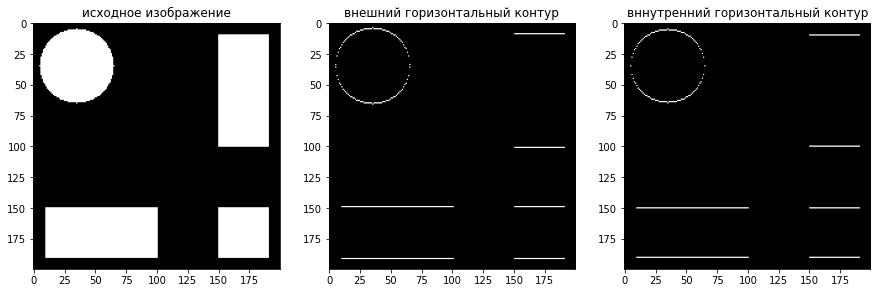

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.title("исходное изображение")
plt.imshow(img, cmap = 'gray')


plt.subplot(1, 3, 2)
plt.title("внешний горизонтальный контур")
plt.imshow(vert_out, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("вннутренний горизонтальный контур")
plt.imshow(vert_in, cmap = 'gray')
plt.show()

In [22]:
struct_horizon = np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])

In [23]:
horizon_in = (dilate(img, struct_horizon) - img)
horizon_out = (img - erose(img, struct_horizon))

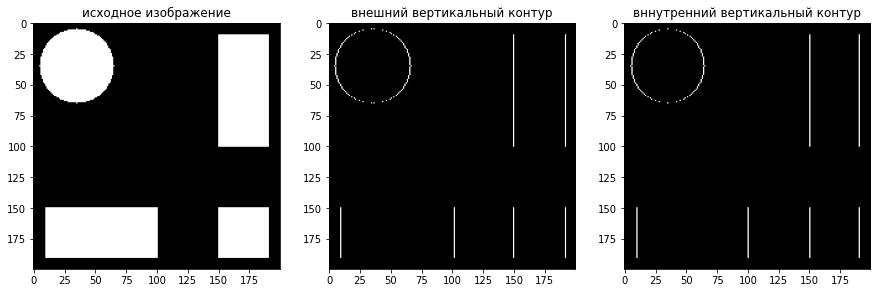

In [24]:
plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.title("исходное изображение")
plt.imshow(img, cmap = 'gray')


plt.subplot(1, 3, 2)
plt.title("внешний вертикальный контур")
plt.imshow(horizon_in, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.title("вннутренний вертикальный контур")
plt.imshow(horizon_out, cmap = 'gray')
plt.show()